In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import scipy.io as sio
from numpy import linalg as LA
# you can use pip to install/update missing packages. 

In [2]:
## Load the data 

# Load the partially observed (Rpartial) rating matrices (xxuyyi means #xx users #yy items)
data = sio.loadmat('100u10icompl.mat')
Rcompl = data['Rcompl']

[m,n] = np.shape(Rcompl)

In [3]:
## Question 5 (ii) (use cvxpy, make sure to use cp. and avoid np.)

Zi = 19
Error = np.zeros((Zi,1)) 
for z in range(0,Zi):
    # print something to make sure you are making progress
    print(z)
    Rpartial = np.zeros((m,n))
    p = (z+1)*0.05
    for i in range(0,m):
        for j in range(0,n):
            if np.random.rand(1)>=1-p: 
                Rpartial[i,j]=Rcompl[i,j]

    # Define the decision variables: 
    # Note! X is not symmetric. 
    # Without the 'full' constraint: wrong. 

    X = cp.Variable((m, n))
    Lambda11 = cp.Variable((n, n), symmetric=True)
    Lambda22 = cp.Variable((m, m), symmetric=True)

    # Define the objective function:
    # Note! You cannot always group the Lambda matrices (dimension might differ).
    obj = 0.5 * (cp.trace(Lambda11) + cp.trace(Lambda22))

    # Define the constraints:
    # Constraints enforcing observed ratings (use Rpartial) 
    # that is, if Rij==0, the value is "not observed". 
    constr = []
    observed = Rpartial != 0
    constr.append(X[observed] == Rpartial[observed])


    # Define the constraints enforcing the range beween 1 and 5
    constr.append(X >= 1)
    constr.append(X <= 5)
    # Define the semidefinite constraint
    bmat = cp.bmat([[Lambda11, -X.T], [-X, Lambda22]])
    constr.append(bmat >> 0)
    ## Solve the SDP

    # Make sure you have a SDP solver   
    # 100u20i can take a few minutes (tic-toc measures the time) 
    # Set 'verbose' to 1 if you want to see the progress
    prob = cp.Problem(cp.Minimize(obj), constr)
    prob.solve(solver=cp.MOSEK, verbose=False)
    
    # Retrieve and round the optimal solution
    # Convice yourself of the validity of the rounding. 
    Xopt_real = X.value
    Xopt_int = np.ceil(Xopt_real)
    Error[z] =  np.linalg.norm(Rcompl-Xopt_int,'fro')/np.linalg.norm(Rcompl,'fro')


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


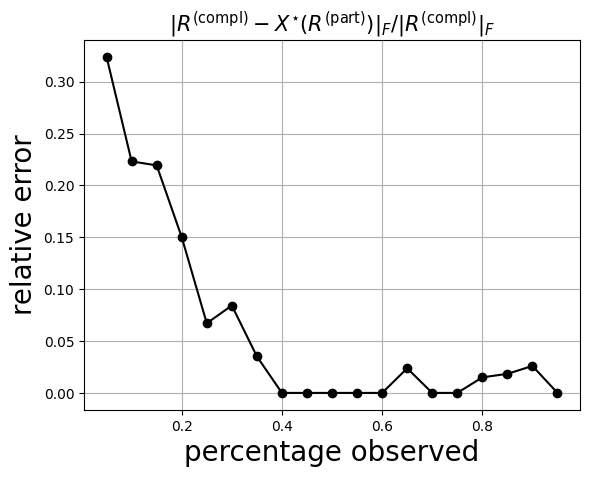

In [19]:
# Plot the results 
p = np.linspace(0.05, 0.95, num=Zi)   
plt.plot(p, Error,marker="o", color="black")
plt.title(r'$\left\|R^{(\mathrm{compl })}-X^{\star}\left(R^{(\mathrm{part })}\right)\right\|_F /\left\|R^{(\mathrm{compl })}\right\|_F$' ,fontsize=15)
plt.xlabel('percentage observed',fontsize=20)
plt.ylabel('relative error',fontsize=20)
plt.grid(True)
plt.show()


In [5]:
# You can see that we indeed recover Rcompl
print(Xopt_int)

[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
 [4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [3. 3. 3.

In [8]:
np.array_equal(Rcompl, Xopt_int)

True